In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set();

In [5]:
df = pd.read_excel('../data/coalpublic2010.xls', header=3, index_col='MSHA ID')
df.head()

,Year,Mine Name,Mine State,Mine County,Mine Basin,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Production (short tons),Average Employees,Labor Hours
MSHA ID,,,,,,,,,,,,,,,
103335,2010,Thompson South Mine,Alabama,Bibb,Appalachia Southern,Active,Surface,Indepedent Producer Operator,Mine only,"M&b Excavating Co., Inc., Llc","1001 Heflin Avenue West, Birmingham, AL 35214",NaN,103,1,30
103381,2010,Tacoa Highwall Miner,Alabama,Bibb,Appalachia Southern,Active,Surface,Indepedent Producer Operator,Mine only,"Tacoa Minerals,llc","1669 Mission Hills Road, Alabaster, AL 35007",NaN,127564,13,33241
100787,2010,Rosa Mine,Alabama,Blount,Appalachia Southern,"Active, men working, not producing",Surface,Indepedent Producer Operator,Preparation Plant,Mcoal Corporation,"P.O. Box 1056, Oneonta, AL 35121",NaN,0,16,35020
103404,2010,Reid School Mine,Alabama,Blount,Appalachia Southern,Active,Surface,Indepedent Producer Operator,Mine only,"Taft Coal Sales & Associates,","107 N. Walston Bridge Road, Jasper, AL 35504",NaN,148994,32,76025
103117,2010,"Mine #2, #3, #4",Alabama,Cullman,Appalachia Southern,Temporarily closed,Surface,Operating Subsidiary,Mine only,"Evergreen Mining, Llc","74 Indutrial Parkway, Jasper, AL 35001",NaN,69035,17,34365


In [6]:
df['Company Type'].unique()

array(['Indepedent Producer Operator', 'Operating Subsidiary',
       'Contractor'], dtype=object)

In [7]:
df['Company Type'].replace(to_replace = 'Indepedent Producer Operator', 
                           value = 'Independent Producer Operator',
                          inplace = True)

In [8]:
df['Company Type'].unique()

array(['Independent Producer Operator', 'Operating Subsidiary',
       'Contractor'], dtype=object)

In [9]:
df.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)

In [10]:
df.head()

,Year,Mine_Name,Mine_State,Mine_County,Mine_Basin,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Production_(short_tons),Average_Employees,Labor_Hours
MSHA ID,,,,,,,,,,,,,,,
103335,2010,Thompson South Mine,Alabama,Bibb,Appalachia Southern,Active,Surface,Independent Producer Operator,Mine only,"M&b Excavating Co., Inc., Llc","1001 Heflin Avenue West, Birmingham, AL 35214",NaN,103,1,30
103381,2010,Tacoa Highwall Miner,Alabama,Bibb,Appalachia Southern,Active,Surface,Independent Producer Operator,Mine only,"Tacoa Minerals,llc","1669 Mission Hills Road, Alabaster, AL 35007",NaN,127564,13,33241
100787,2010,Rosa Mine,Alabama,Blount,Appalachia Southern,"Active, men working, not producing",Surface,Independent Producer Operator,Preparation Plant,Mcoal Corporation,"P.O. Box 1056, Oneonta, AL 35121",NaN,0,16,35020
103404,2010,Reid School Mine,Alabama,Blount,Appalachia Southern,Active,Surface,Independent Producer Operator,Mine only,"Taft Coal Sales & Associates,","107 N. Walston Bridge Road, Jasper, AL 35504",NaN,148994,32,76025
103117,2010,"Mine #2, #3, #4",Alabama,Cullman,Appalachia Southern,Temporarily closed,Surface,Operating Subsidiary,Mine only,"Evergreen Mining, Llc","74 Indutrial Parkway, Jasper, AL 35001",NaN,69035,17,34365


In [11]:
len(df)

1752

Text(0, 0.5, 'Total Hours Worked')

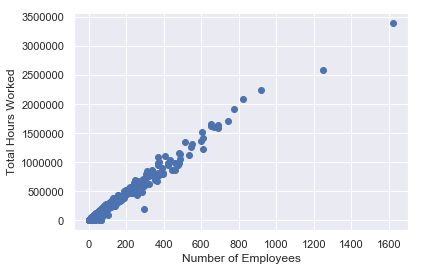

In [13]:
plt.scatter(df.Average_Employees, df.Labor_Hours)
plt.xlabel('Number of Employees')
plt.ylabel('Total Hours Worked')

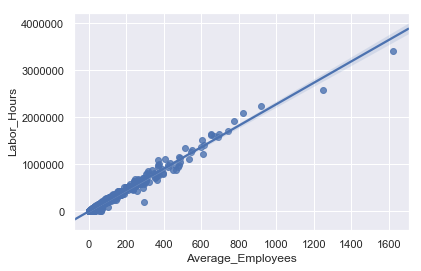

In [15]:
sns.regplot(df.Average_Employees, df.Labor_Hours)
plt.savefig('../figures/2019-07-30'+'-employees_vs_hours.png')

In [17]:
for col in df.columns:
    print (col)

Year
Mine_Name
Mine_State
Mine_County
Mine_Basin
Mine_Status
Mine_Type
Company_Type
Operation_Type
Operating_Company
Operating_Company_Address
Union_Code
Production_(short_tons)
Average_Employees
Labor_Hours


In [18]:
df.columns

Index(['Year', 'Mine_Name', 'Mine_State', 'Mine_County', 'Mine_Basin',
       'Mine_Status', 'Mine_Type', 'Company_Type', 'Operation_Type',
       'Operating_Company', 'Operating_Company_Address', 'Union_Code',
       'Production_(short_tons)', 'Average_Employees', 'Labor_Hours'],
      dtype='object')

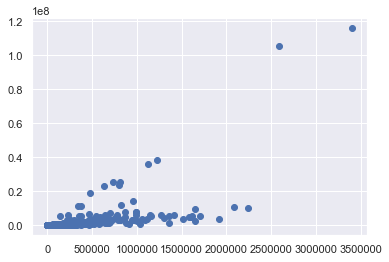

In [19]:
plt.scatter(df.Labor_Hours, df['Production_(short_tons)'])

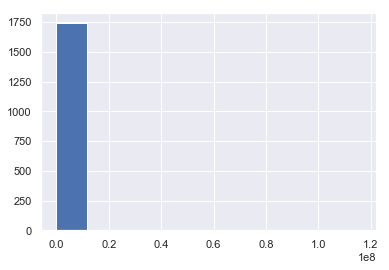

In [20]:
df['Production_(short_tons)'].hist()

In [23]:
# We are removing data here!
df = df[df['Production_(short_tons)'] > 0]

In [26]:
df['log_production']= np.log(df['Production_(short_tons)'])

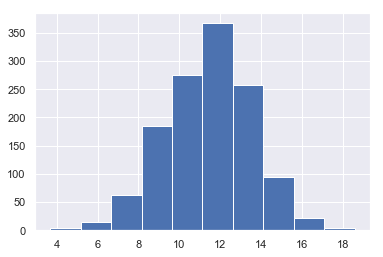

In [27]:
df.log_production.hist()

In [28]:
df.to_csv('../data/cleaned_coalpublic2010.csv')